### 1

In [1]:
import sys
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

def newton(f, dfdx, x_0, 
           maxiter=40, 
           ftol=100*sys.float_info.epsilon, 
           xtol=100*sys.float_info.epsilon):
    """
    newton(f, dfdx, x_0 [maxiter, ftol, xtol])

    Use Newton's method to find a root of `f` starting from `x_0`, where
    `dfdx` is the derivative of `f`. Returns a vector of root estimates.

    The optional keyword parameters set the maximum number of iterations
    and the stopping tolerance for values of `f` and changes in `x`.
    """
    x = [float(x_0)]
    y = f(x_0)
    delta_x = float('inf')  # for initial pass bellow
    k = 0

    while abs(delta_x) > xtol and abs(y) > ftol:
        dydx = dfdx(x[k])
        delta_x = -y / dydx  # Newton's step
        x.append(x[k] + delta_x)  # append new estimate

        k += 1
        y = f(x[k])
        if k == maxiter:
            print("Warning: Maximum number of iterations reached.")
            break
    return x

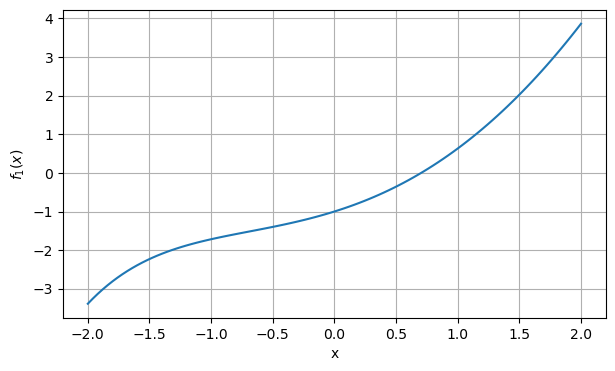

In [2]:
def f_1(x):
    # x \in [-2, 2]
    return x**2 - np.exp(-x)

def d_f_1(x):
    return 2*x + np.exp(-x)

# plot and determine how many roots lie in the interval
x = np.linspace(-2, 2, 101)
plt.figure(figsize=(7, 4))
plt.plot(x, f_1(x))
plt.xlabel('x')
plt.ylabel('$f_1(x)$')
plt.grid()
plt.show()

In [3]:
# find a reference value for the root
r_1 = root(f_1, 0.5, tol=1e-15).x[0]
print("root of f_1: ", r_1)

root of f_1:  0.7034674224983917


In [4]:
# use the newton method to find the root
x_1_seq = newton(f_1, d_f_1, 0.5)
x_1_seq = np.array(x_1_seq)
print(x_1_seq)

[0.5        0.72192584 0.70360083 0.70346743 0.70346742]


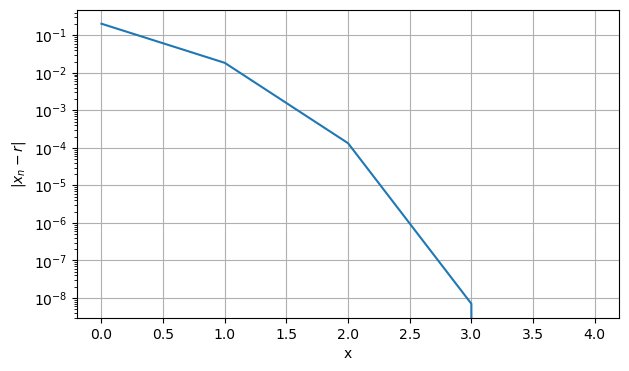

In [5]:
# compute the error and make a log-linear plot
error_x_1 = np.abs(x_1_seq - r_1)
plt.figure(figsize=(7, 4))
plt.plot(error_x_1)
plt.xlabel('x')
plt.ylabel('$|x_n - r|$')
plt.yscale('log')
plt.grid()
plt.show()

In [6]:
# check the sequence whether has quadratic convergence
# lim |\epsilon_{k+1}| / |\epsilon_k|^2 = L ?
# because the error reached machine epsilon so rapidly
# so it may be not obvious...
Ls = [np.abs(error_x_1[k+1]) / np.abs(error_x_1[k])**2 for k in range(len(error_x_1) - 2)]
print(Ls)

[0.4458662542122412, 0.391565213086354, 0.39568242849928176]


In [7]:
[
    np.log(np.abs(error_x_1[k+1])) / np.log(np.abs(error_x_1[k])) 
    for k in range(len(error_x_1)-2)
]

[2.5072925536170345, 2.2348567170851106, 2.10391568385207]

#### 2

In [8]:
# Please finish according to above code.

### 3

In [9]:
# Please finish according to above code.

### 4

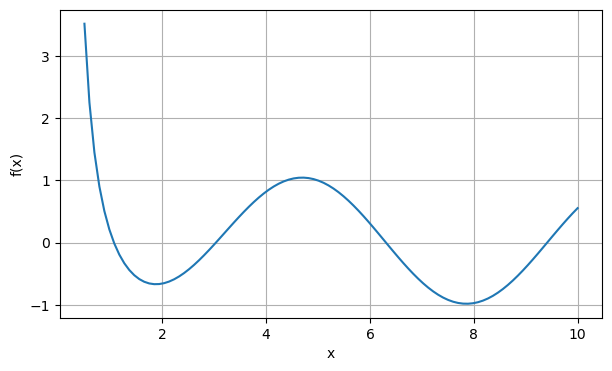

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def f(x):
    return x**(-2) - np.sin(x)

x_interval = np.linspace(0.5, 10, 100)
plt.figure(figsize=(7, 4))
plt.plot(x_interval, f(x_interval))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [11]:
def d_f(x):
    return -2 * x**(-3) - np.cos(x)

x_0_list = [i for i in range(1, 8)]
result_list = []
for x_0 in x_0_list:
    r = newton(f, d_f, x_0)[-1]
    result_list.append([x_0, r])

print(tabulate(result_list, headers=["x_0", "r"]))

  x_0        r
-----  -------
    1  1.06822
    2  6.30832
    3  3.03265
    4  3.03265
    5  9.41349
    6  6.30832
    7  6.30832
